In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from scipy.stats import f_oneway, ttest_ind

In [2]:
warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid')

In [3]:
# Load the dataset
df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


# Explanatory Data Analysis (EDA)

In [4]:
# Overview of the dataset
print(df.head())
print(df.info())
print(df.describe())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

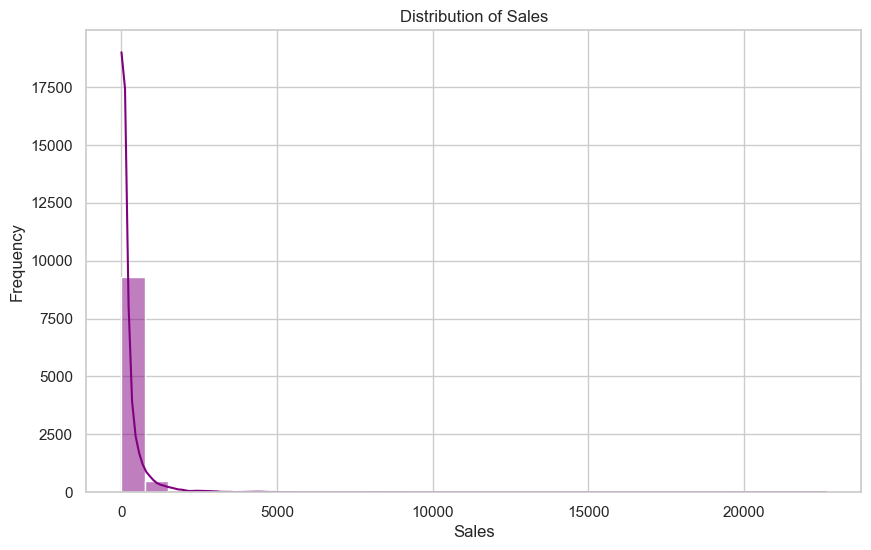

In [5]:
# Exploring numerical variables
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True, color='purple')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

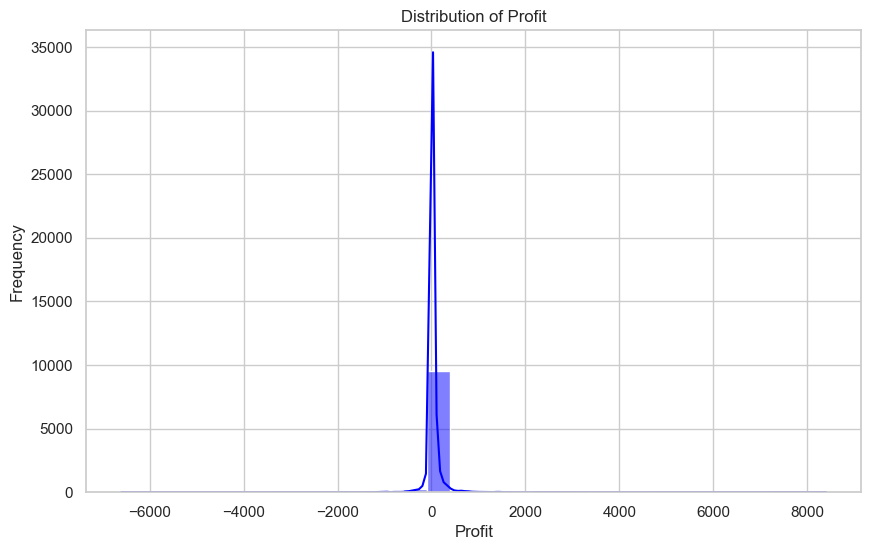

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], bins=30, kde=True, color='blue')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

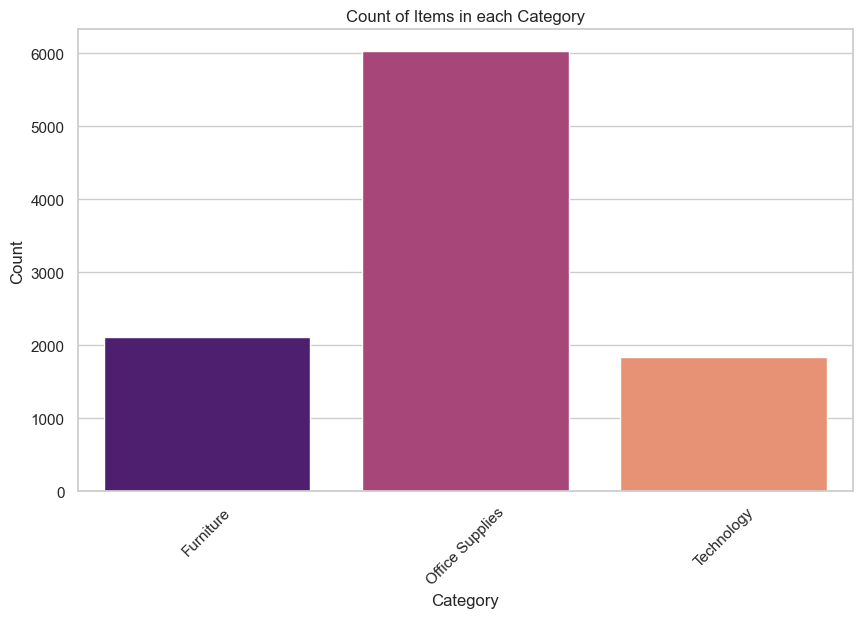

In [7]:
# Exploring categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', palette='magma')
plt.title('Count of Items in each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

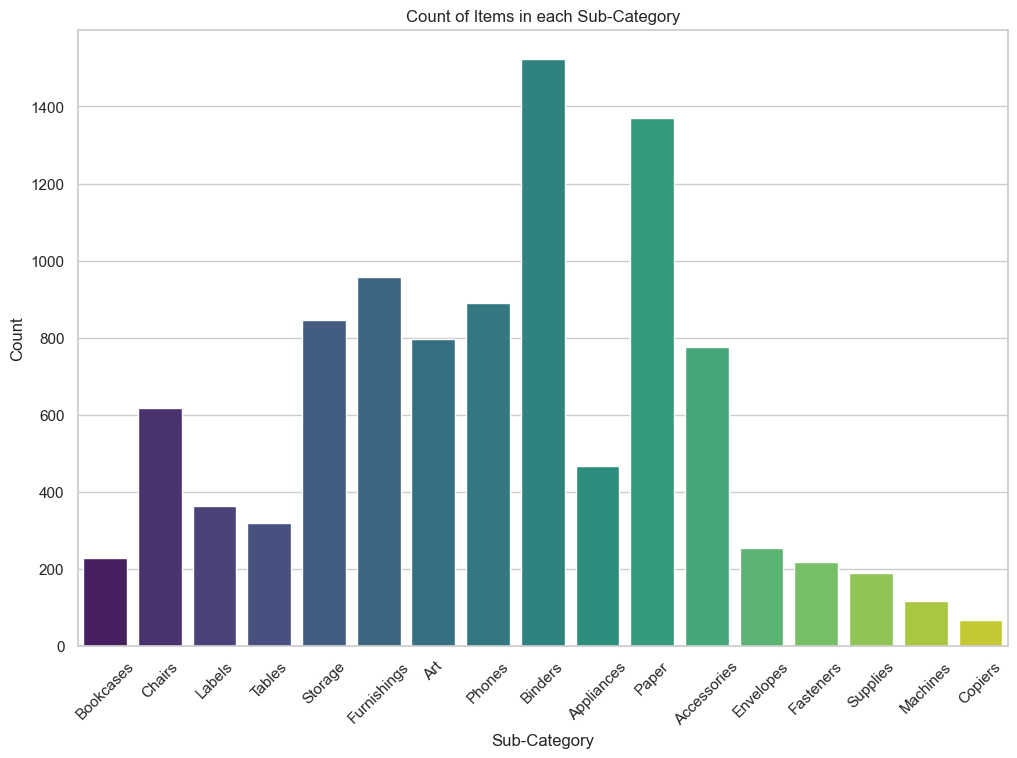

In [8]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Sub-Category', palette='viridis')
plt.title('Count of Items in each Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

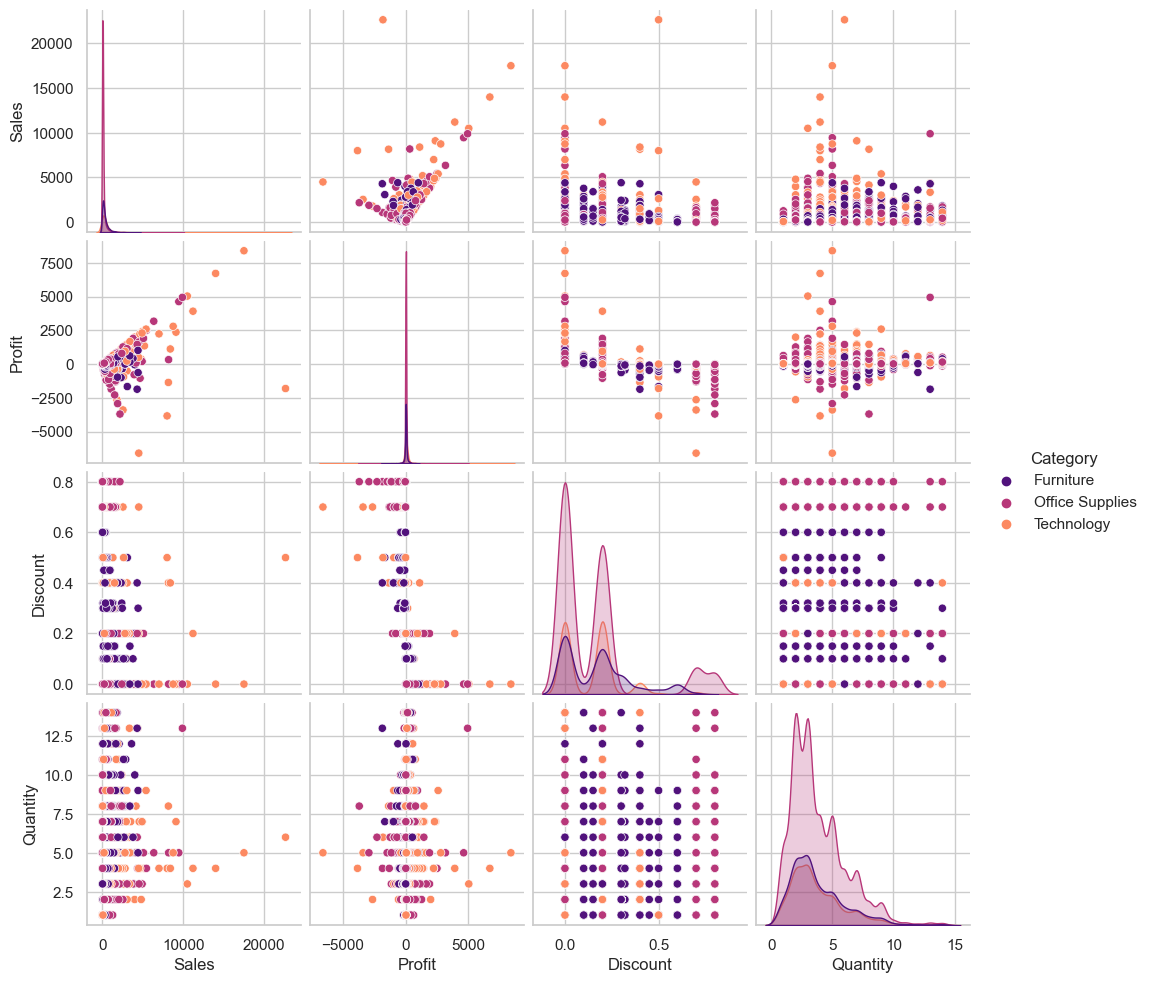

In [9]:
# Pairplot to visualize the relationships between numerical variables
sns.pairplot(df, vars=['Sales', 'Profit', 'Discount', 'Quantity'], hue='Category', palette='magma')
plt.show()

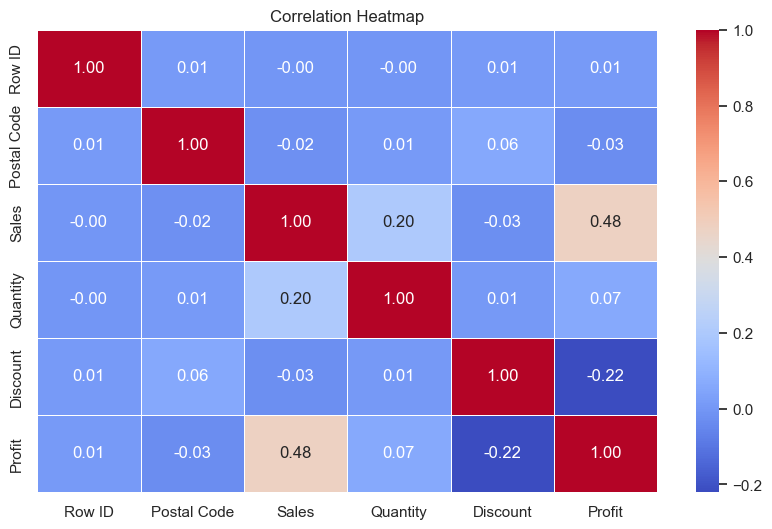

In [10]:
# Heatmap to check correlation between numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

In [11]:
# Dropping irrelevant columns
df_drop = df.drop(['Row ID', 'Order ID', 'Postal Code', 'Product ID', 'Product Name'], axis=1)

In [12]:
# Check missing values
print(df_drop.isnull().sum())

Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Category         0
Sub-Category     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [13]:
# Dropping duplicate rows if any
df_drop.drop_duplicates(inplace=True)

In [14]:
# Grouping and aggregating data to get insights
grouped_state = df_drop.groupby('State').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

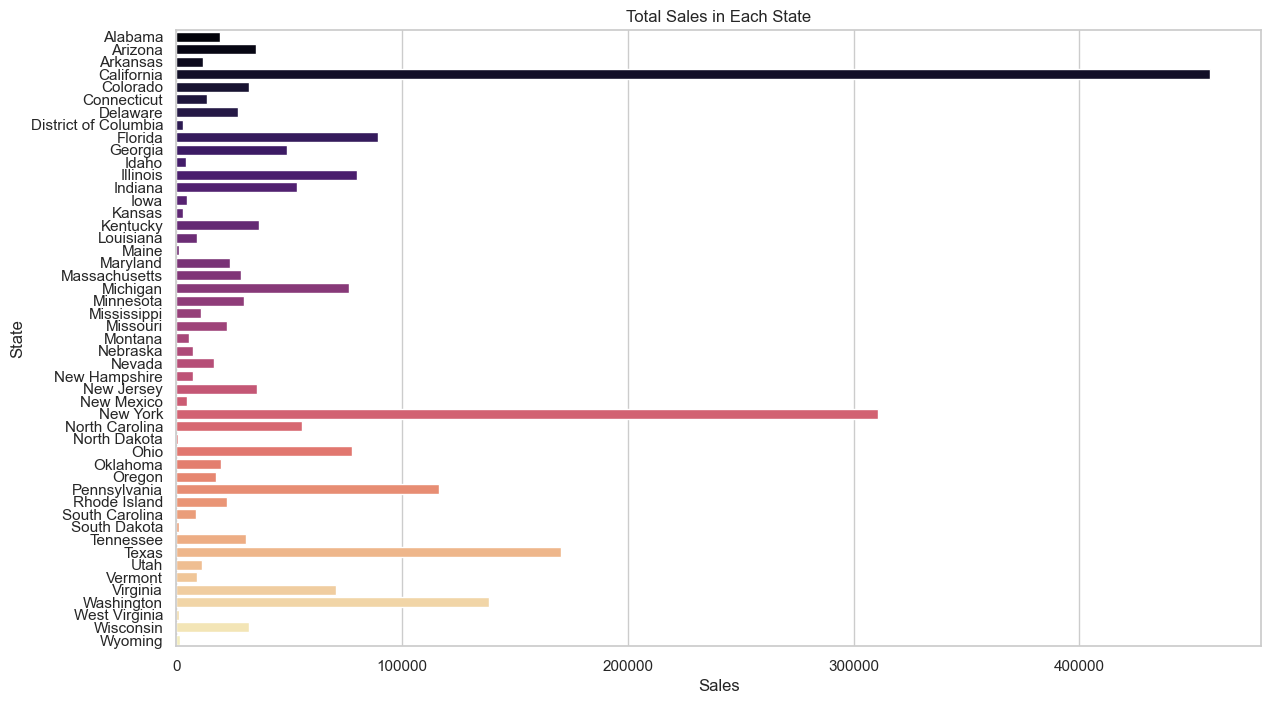

In [15]:
# Plotting Sales and Profit for each State
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_state, x='Sales', y='State', palette='magma')
plt.title('Total Sales in Each State')
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()

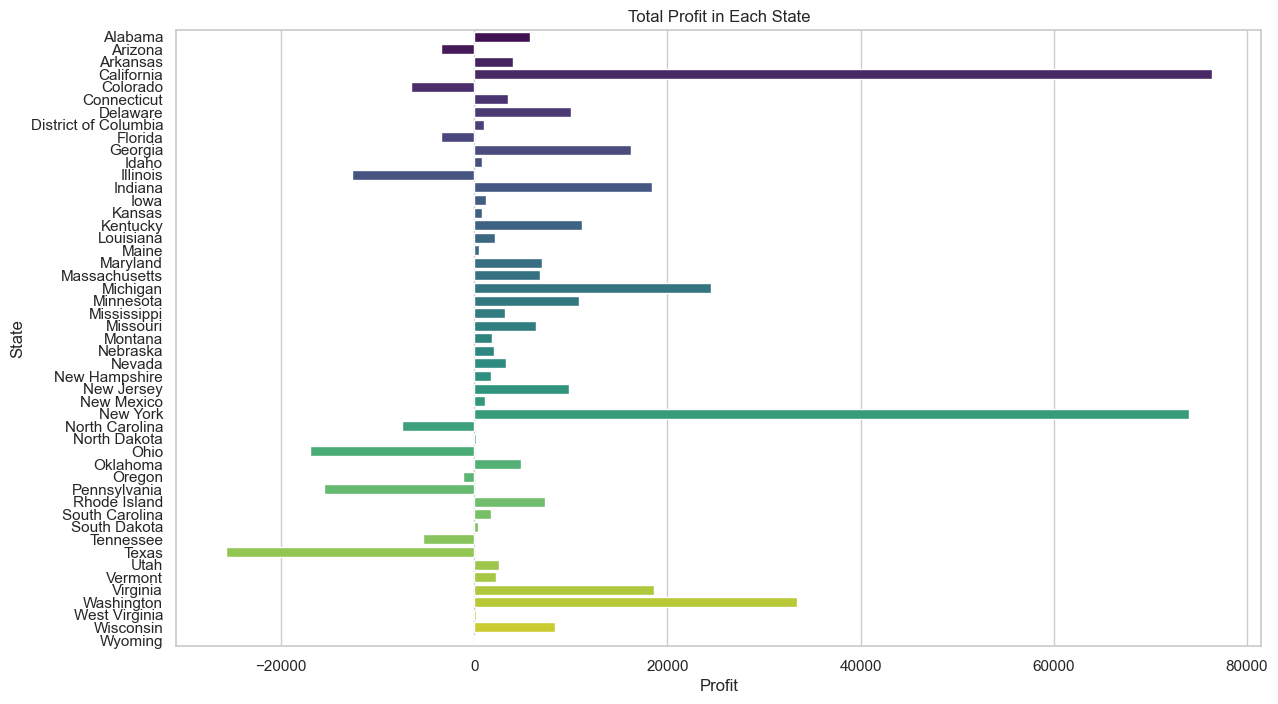

In [16]:
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_state, x='Profit', y='State', palette='viridis')
plt.title('Total Profit in Each State')
plt.xlabel('Profit')
plt.ylabel('State')
plt.show()

In [17]:
# Extracting year and month from the Order Date column
df_drop['Order Date'] = pd.to_datetime(df_drop['Order Date'])
df_drop['Year'] = df_drop['Order Date'].dt.year
df_drop['Month'] = df_drop['Order Date'].dt.month

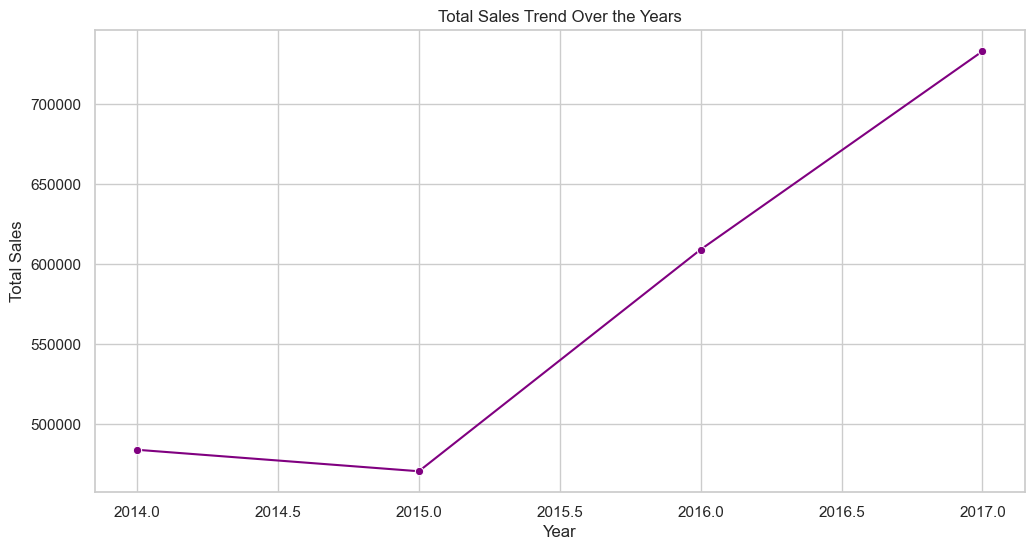

In [18]:
# Plotting sales and profit trends over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_drop, x='Year', y='Sales', estimator=sum, ci=None, marker='o', color='purple')
plt.title('Total Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

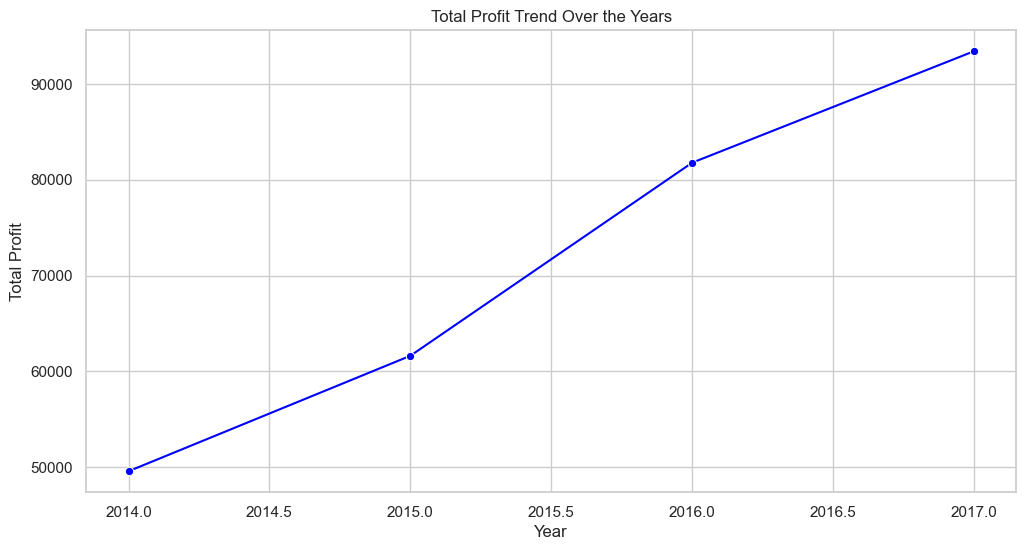

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_drop, x='Year', y='Profit', estimator=sum, ci=None, marker='o', color='blue')
plt.title('Total Profit Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.show()

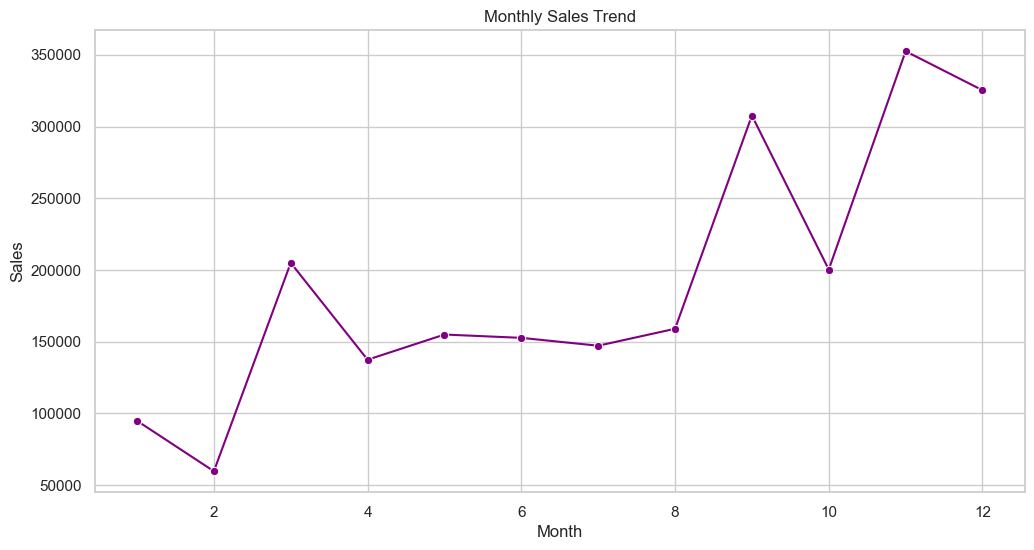

In [20]:
# Plotting monthly sales and profit trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_drop, x='Month', y='Sales', estimator=sum, ci=None, marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

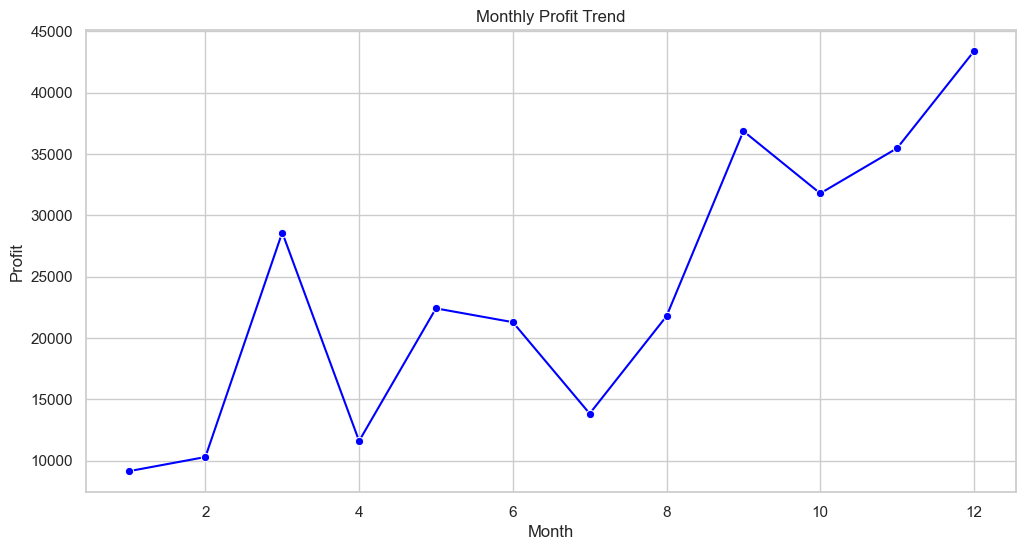

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_drop, x='Month', y='Profit', estimator=sum, ci=None, marker='o', color='blue')
plt.title('Monthly Profit Trend')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()

In [22]:
# Calculate the average discount for each category
category_discount = df_drop.groupby('Category')['Discount'].mean().reset_index()

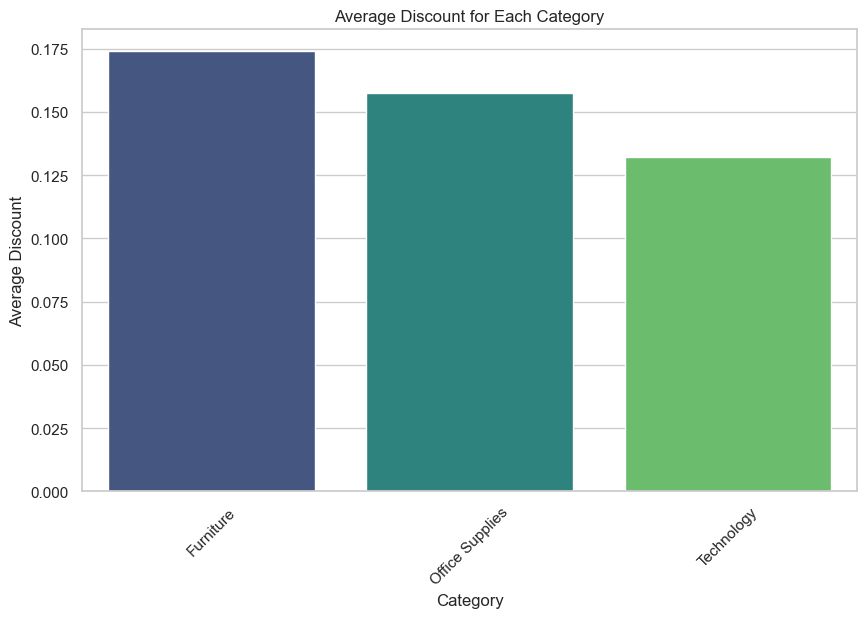

In [23]:
# Plotting average discount for each category
plt.figure(figsize=(10, 6))
sns.barplot(data=category_discount, x='Category', y='Discount', palette='viridis')
plt.title('Average Discount for Each Category')
plt.xlabel('Category')
plt.ylabel('Average Discount')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Calculating the total sales and profit for each sub-category
sub_category_summary = df_drop.groupby('Sub-Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

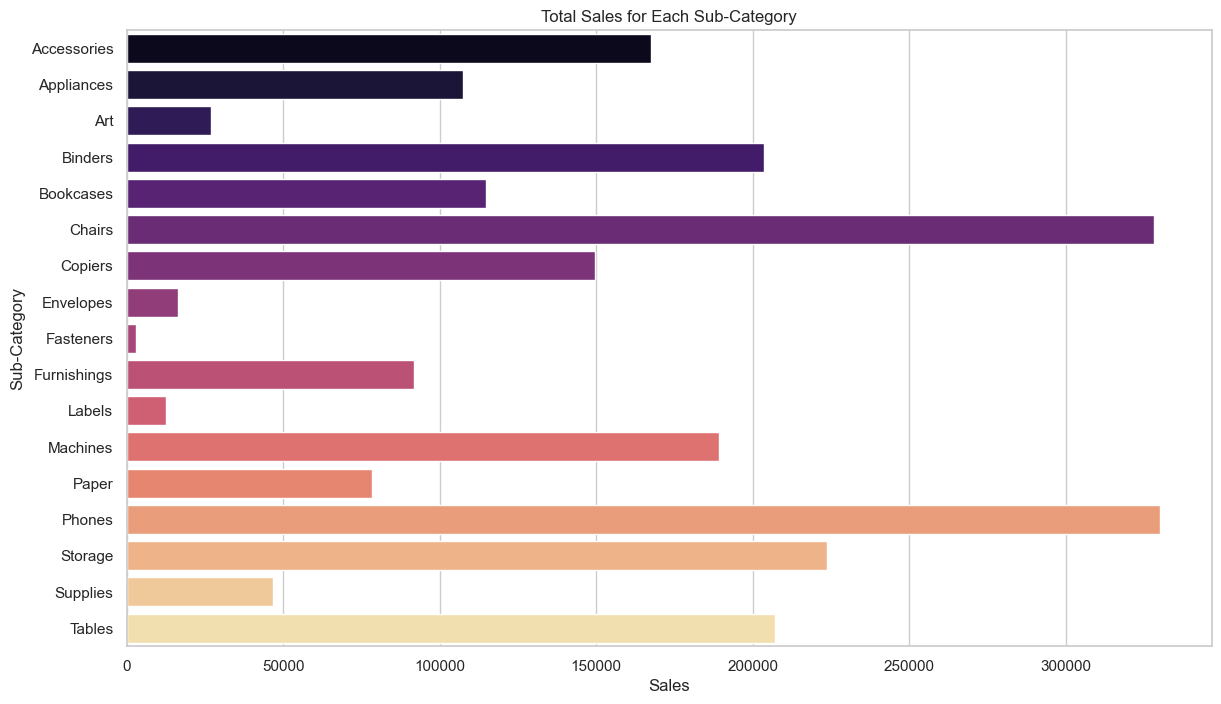

In [25]:
# Plotting total sales and profit for each sub-category
plt.figure(figsize=(14, 8))
sns.barplot(data=sub_category_summary, x='Sales', y='Sub-Category', palette='magma')
plt.title('Total Sales for Each Sub-Category')
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.show()

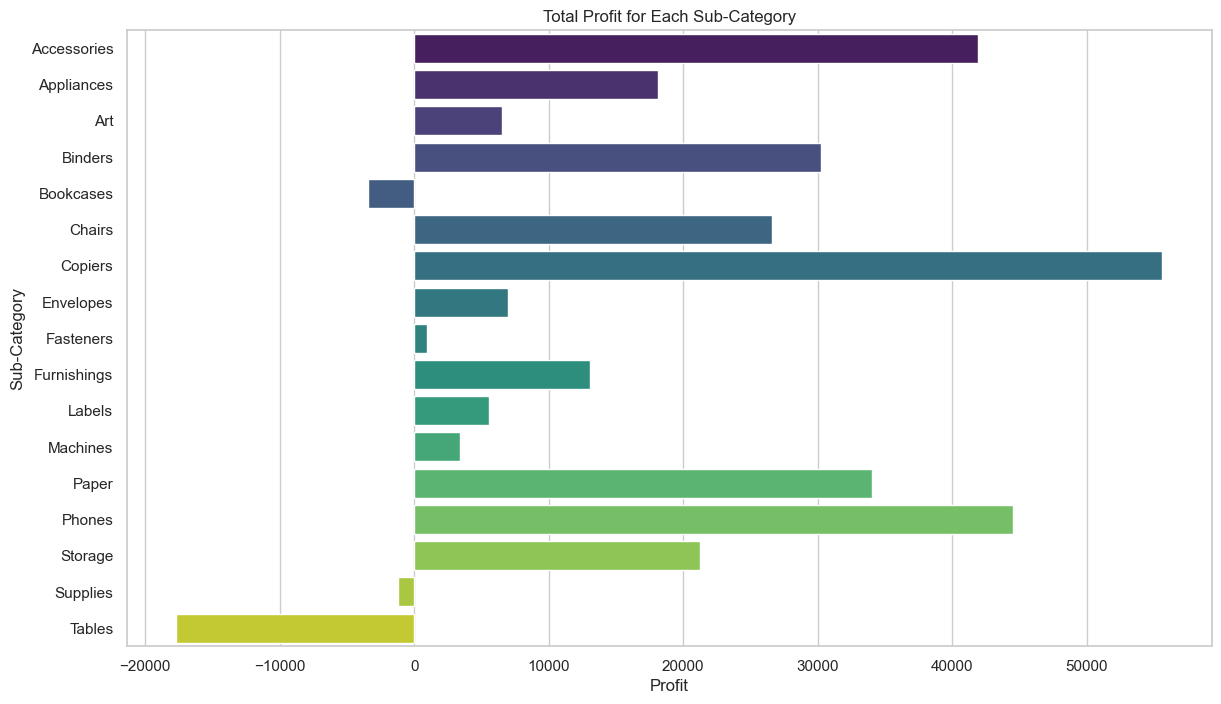

In [26]:
plt.figure(figsize=(14, 8))
sns.barplot(data=sub_category_summary, x='Profit', y='Sub-Category', palette='viridis')
plt.title('Total Profit for Each Sub-Category')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.show()

In [28]:
#convert date in appropriate date format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

# Data Preprocessing for Sales

In [29]:
# Data Preprocessing for Sales Prediction
scaler = StandardScaler()
scalecol = ['Sales', 'Quantity', 'Discount', 'Profit']
for i in scalecol:
    df[i] = scaler.fit_transform(df[[i]])

In [35]:
# One-hot encode categorical variables for sales prediction
categorical_cols = ['Ship Mode', 'Segment', 'State', 'Region', 'Category', 'Sub-Category']

In [43]:
# Drop any remaining non-numeric columns
df = df.select_dtypes(include=[np.number])

In [44]:
# Split data into features (X) and target (y) for sales prediction
y_sales = df['Sales']
X_sales = df.drop(['Sales'], axis=1)

In [45]:
# Train-test split for sales prediction
X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(X_sales, y_sales, test_size=0.2, random_state=3)

In [46]:
# Ensure test set has the same columns as the training set after one-hot encoding
X_test_sales = X_test_sales.reindex(columns=X_train_sales.columns, fill_value=0)

# Model Training and Evaluation for Sales Prediction

In [47]:
# Model Training and Evaluation for sales prediction
models = ['SVR', 'Ridge', 'LinearRegression', 'RandomForestRegressor', 'DecisionTreeRegressor']
sales_results = []

In [48]:
svr_model_sales = SVR(kernel='rbf').fit(X_train_sales, y_train_sales)
ridge_model_sales = Ridge().fit(X_train_sales, y_train_sales)
lr_model_sales = LinearRegression().fit(X_train_sales, y_train_sales)
rf_model_sales = RandomForestRegressor(n_estimators=10, random_state=0).fit(X_train_sales, y_train_sales)
dt_model_sales = DecisionTreeRegressor(random_state=0).fit(X_train_sales, y_train_sales)

In [49]:
svr_pred_sales = svr_model_sales.predict(X_test_sales)
ridge_pred_sales = ridge_model_sales.predict(X_test_sales)
lr_pred_sales = lr_model_sales.predict(X_test_sales)
rf_pred_sales = rf_model_sales.predict(X_test_sales)
dt_pred_sales = dt_model_sales.predict(X_test_sales)

In [50]:
sales_results.append(r2_score(y_test_sales, svr_pred_sales))
sales_results.append(r2_score(y_test_sales, ridge_pred_sales))
sales_results.append(r2_score(y_test_sales, lr_pred_sales))
sales_results.append(r2_score(y_test_sales, rf_pred_sales))
sales_results.append(r2_score(y_test_sales, dt_pred_sales))

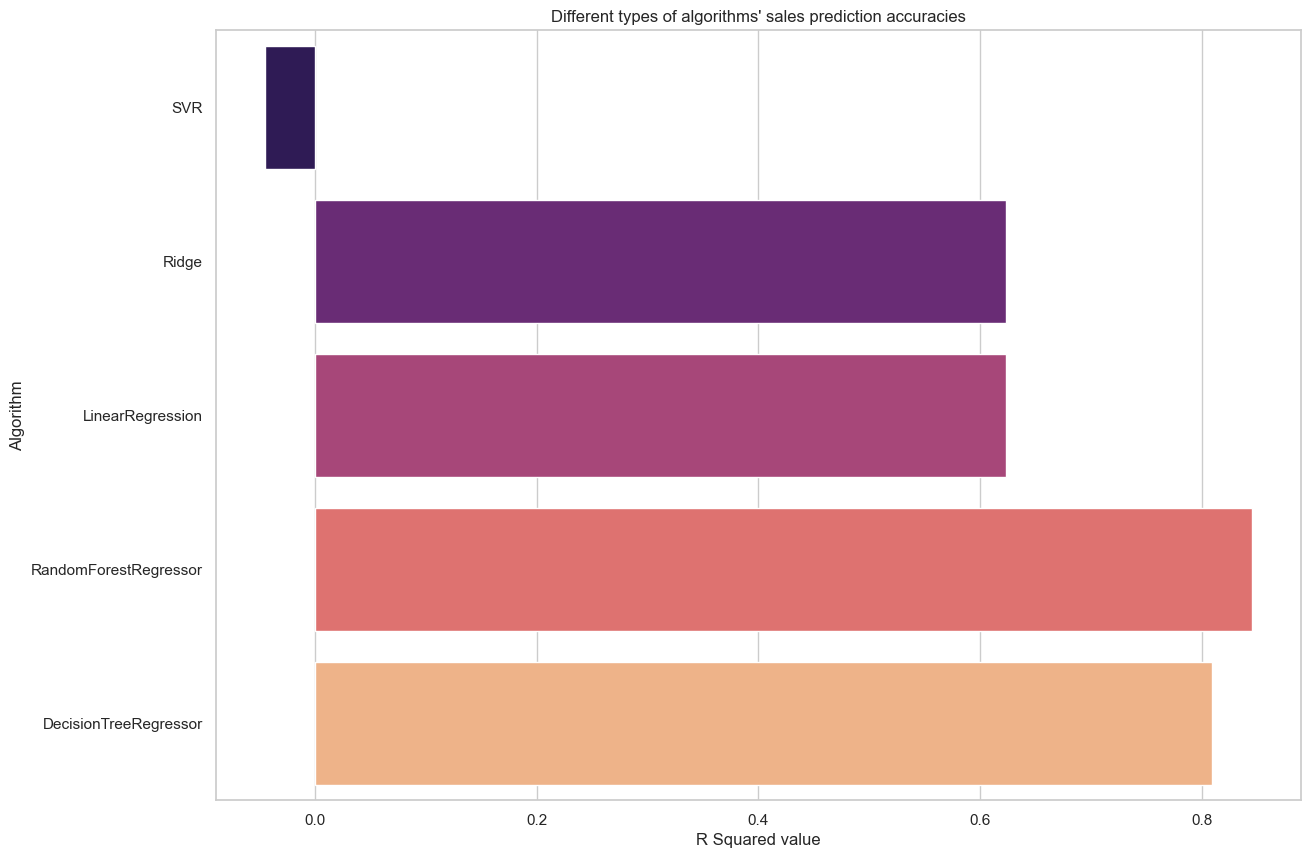

In [51]:
# Plotting the sales prediction accuracy
plt.figure(figsize=(14, 10))
sns.barplot(y=models, x=sales_results, palette='magma')
plt.title("Different types of algorithms' sales prediction accuracies")
plt.xlabel('R Squared value')
plt.ylabel('Algorithm')
plt.show()

In [52]:
# Hyperparameter Tuning for Random Forest (Sales Prediction)
n_estimates_rndm_st = np.arange(10, 100, 10)
estimator_values_sales = []

for i in n_estimates_rndm_st:
    rfr_selected_model_sales = RandomForestRegressor(n_estimators=i, random_state=i).fit(X_train_sales, y_train_sales)
    rfr_pred_sales = rfr_selected_model_sales.predict(X_test_sales)
    estimator_values_sales.append(r2_score(y_test_sales, rfr_pred_sales))

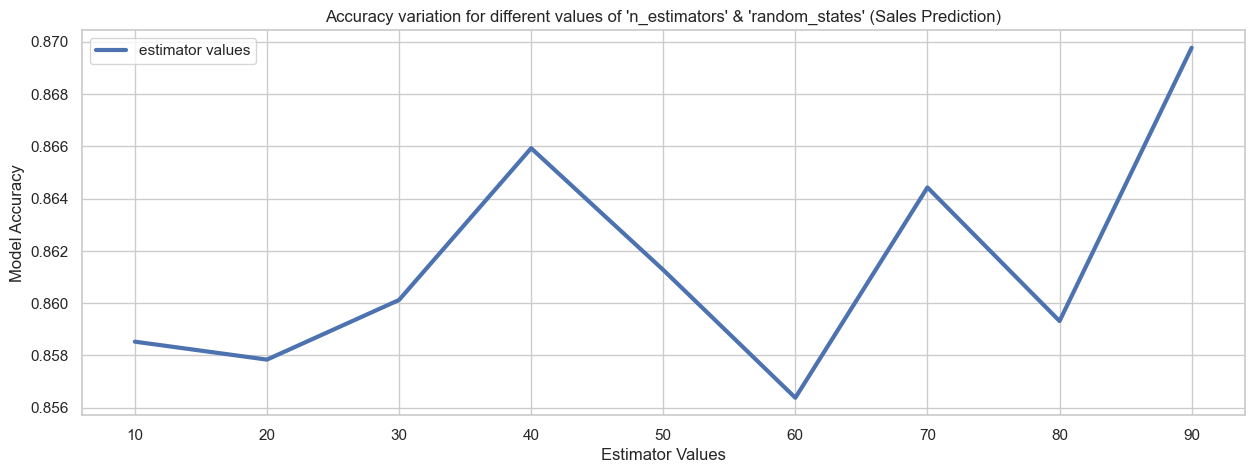

In [53]:
plt.figure(figsize=(15, 5))
sns.lineplot(x=n_estimates_rndm_st, y=estimator_values_sales, label='estimator values', linewidth=3)
plt.title("Accuracy variation for different values of 'n_estimators' & 'random_states' (Sales Prediction)")
plt.xlabel('Estimator Values')
plt.ylabel('Model Accuracy')
plt.show()

In [54]:
# Final Sales Prediction Model
rfr_selected_model_sales = RandomForestRegressor(n_estimators=10, random_state=10).fit(X_train_sales, y_train_sales)
rfr_pred_sales = rfr_selected_model_sales.predict(X_test_sales)
sales_accuracy = r2_score(y_test_sales, rfr_pred_sales)
print("Sales Prediction Accuracy:", sales_accuracy)

Sales Prediction Accuracy: 0.8585268418189334


# Statistical Analysis for Sales

1.	The effect of region on the sales of product

In [114]:
# Assuming 'Region_East', 'Region_West', and 'Region_South' are binary columns
regions = ['East', 'West', 'South']
result_b = {}

for region in regions:
    sales = df[df['Region_' + region] == 1]['Sales']
    result_b[region] = {'Mean_Sales': np.mean(sales), 'Std_Sales': np.std(sales)}
    
# Print results
for region, result in result_b.items():
    print(f"Region: {region}")
    print(f"Mean Sales: {result['Mean_Sales']}, Standard Deviation: {result['Std_Sales']}")
    if p_value < 0.05:
        print('There is a significant effect of region on sales')
    else:
        print('There is no significant effect of region on sales')
    print()

Region: East
Mean Sales: 0.013603850082269674, Standard Deviation: 0.9958116314926795
There is a significant effect of region on sales

Region: West
Mean Sales: -0.005399057977747854, Standard Deviation: 0.8420783295141654
There is a significant effect of region on sales

Region: South
Mean Sales: 0.019167807187139608, Standard Deviation: 1.242843071402115
There is a significant effect of region on sales



2. The effect of region on the profit

In [112]:
# Assuming 'Region' is a column representing different regions
regions = ['East', 'West', 'South']

result_d = {}
for region in regions:
    profit = df[df['Region_' + region] == 1]['Profit']
    result_d[region] = {'Mean_Profit': np.mean(profit), 'Std_Profit': np.std(profit)}

# Print results
for region, result in result_d.items():
    print(f"Region: {region}")
    print(f"Mean Profit: {result['Mean_Profit']}, Standard Deviation: {result['Std_Profit']}")
    if p_value < 0.05:
        print('There is a significant effect of region on profit')
    else:
        print('There is no significant effect of region on profit')
    print()

Region: East
Mean Profit: 0.014851377700770123, Standard Deviation: 1.0739066806667736
There is a significant effect of region on profit

Region: West
Mean Profit: 0.022165085380726233, Standard Deviation: 0.7431508976310315
There is a significant effect of region on profit

Region: South
Mean Profit: 0.0008571103484175529, Standard Deviation: 0.9085542597837213
There is a significant effect of region on profit



# Data Preprocessing for Profit Prediction

In [56]:
# Data Preprocessing for Profit Prediction
scaler = StandardScaler()
scalecol = ['Sales', 'Quantity', 'Discount', 'Profit']
for i in scalecol:
    df[i] = scaler.fit_transform(df[[i]])

In [59]:
# One-hot encode categorical variables for profit prediction
categorical_cols = ['Ship Mode', 'Segment', 'State', 'Region', 'Category', 'Sub-Category']

In [60]:
# Split data into features (X) and target (y) for profit prediction
y_profit = df['Profit']
X_profit = df.drop(['Profit'], axis=1)

In [61]:
# Train-test split for profit prediction
X_train_profit, X_test_profit, y_train_profit, y_test_profit = train_test_split(X_profit, y_profit, test_size=0.2, random_state=3)

# Model Training and Evaluation for Profit Predictions

In [62]:
# Model Training and Evaluation for profit prediction
models = ['SVR', 'Ridge', 'LinearRegression', 'RandomForestRegressor', 'DecisionTreeRegressor']
profit_results = []

In [63]:
svr_model_profit = SVR(kernel='rbf').fit(X_train_profit, y_train_profit)
ridge_model_profit = Ridge().fit(X_train_profit, y_train_profit)
lr_model_profit = LinearRegression().fit(X_train_profit, y_train_profit)
rf_model_profit = RandomForestRegressor(n_estimators=10, random_state=0).fit(X_train_profit, y_train_profit)
dt_model_profit = DecisionTreeRegressor(random_state=0).fit(X_train_profit, y_train_profit)

In [64]:
svr_pred_profit = svr_model_profit.predict(X_test_profit)
ridge_pred_profit = ridge_model_profit.predict(X_test_profit)
lr_pred_profit = lr_model_profit.predict(X_test_profit)
rf_pred_profit = rf_model_profit.predict(X_test_profit)
dt_pred_profit = dt_model_profit.predict(X_test_profit)

In [65]:
profit_results.append(r2_score(y_test_profit, svr_pred_profit))
profit_results.append(r2_score(y_test_profit, ridge_pred_profit))
profit_results.append(r2_score(y_test_profit, lr_pred_profit))
profit_results.append(r2_score(y_test_profit, rf_pred_profit))
profit_results.append(r2_score(y_test_profit, dt_pred_profit))

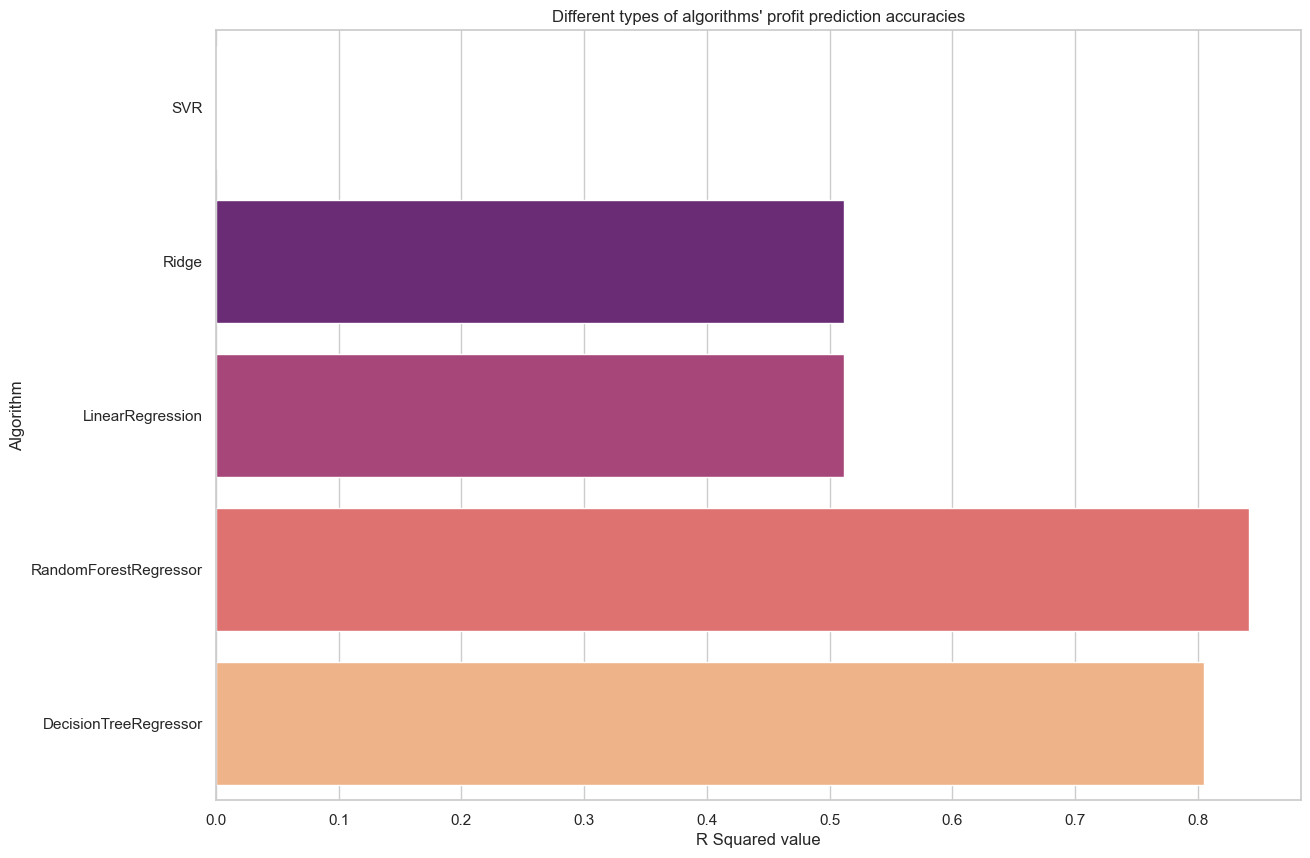

In [66]:
# Plotting the profit prediction accuracy
plt.figure(figsize=(14, 10))
sns.barplot(y=models, x=profit_results, palette='magma')
plt.title("Different types of algorithms' profit prediction accuracies")
plt.xlabel('R Squared value')
plt.ylabel('Algorithm')
plt.show()

In [67]:
# Hyperparameter Tuning for Random Forest (Profit Prediction)
n_estimates_rndm_st = np.arange(10, 100, 10)
estimator_values_profit = []

for i in n_estimates_rndm_st:
    rfr_selected_model_profit = RandomForestRegressor(n_estimators=i, random_state=i).fit(X_train_profit, y_train_profit)
    rfr_pred_profit = rfr_selected_model_profit.predict(X_test_profit)
    estimator_values_profit.append(r2_score(y_test_profit, rfr_pred_profit))

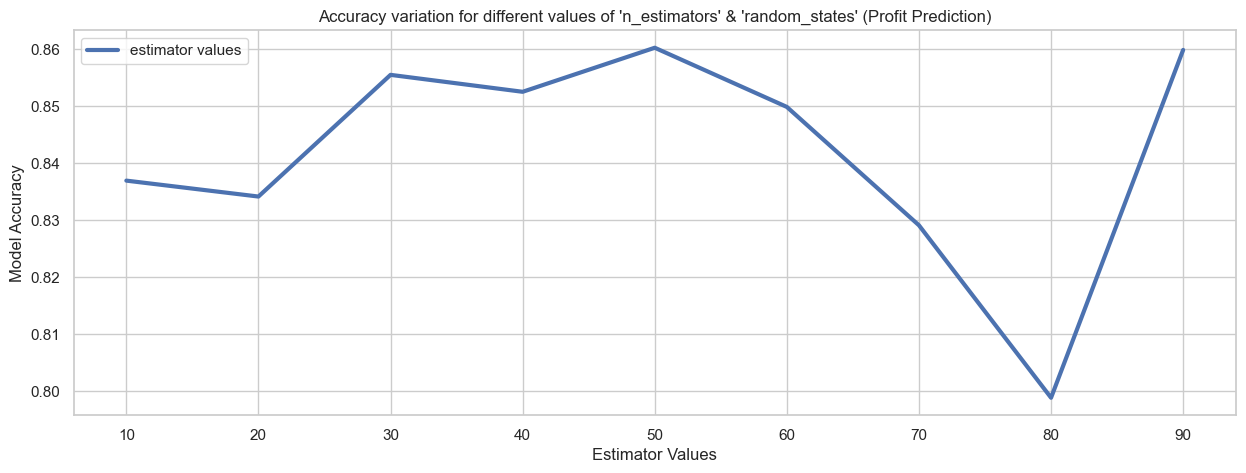

In [68]:
plt.figure(figsize=(15, 5))
sns.lineplot(x=n_estimates_rndm_st, y=estimator_values_profit, label='estimator values', linewidth=3)
plt.title("Accuracy variation for different values of 'n_estimators' & 'random_states' (Profit Prediction)")
plt.xlabel('Estimator Values')
plt.ylabel('Model Accuracy')
plt.show()

In [69]:
# Final Profit Prediction Model
rfr_selected_model_profit = RandomForestRegressor(n_estimators=10, random_state=10).fit(X_train_profit, y_train_profit)
rfr_pred_profit = rfr_selected_model_profit.predict(X_test_profit)
profit_accuracy = r2_score(y_test_profit, rfr_pred_profit)
print("Profit Prediction Accuracy:", profit_accuracy)

Profit Prediction Accuracy: 0.8369722258839281
